In [4]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('C:\DataScience\shampoo-sales.csv', header=0, parse_dates=[0], index_col=0,squeeze=True, date_parser=parser)
series.head(36)

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: shampoosales, dtype: float64

In [5]:
series.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: shampoosales, dtype: float64

In [6]:
#keep test data of 1903
train=series[0:24]
test=series[24:]


In [7]:
train.mean()

229.62500000000003

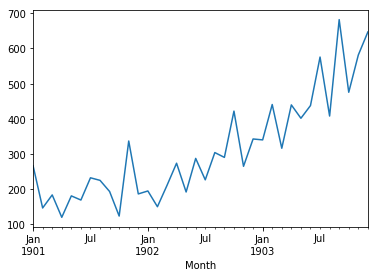

In [10]:
# show plots in the notebook
%matplotlib inline
series.plot()
pyplot.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


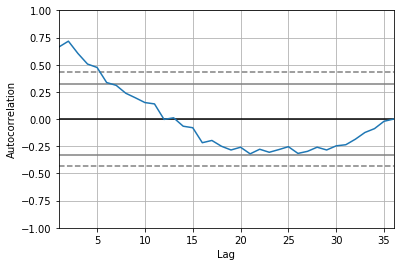

In [12]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:         D.shampoosales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Sun, 23 Dec 2018   AIC                            406.340
Time:                        01:40:14   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.shampoosales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.sham

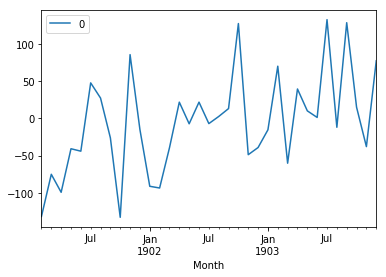

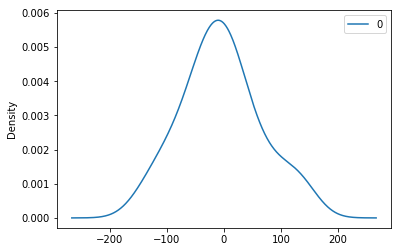

                0
count   35.000000
mean    -5.495254
std     68.132879
min   -133.296652
25%    -42.477919
50%     -7.186614
75%     24.748292
max    133.237922


In [14]:
from pandas import DataFrame

#fit the model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=349.117651, expected=342.300000
predicted=306.512974, expected=339.700000
predicted=387.376363, expected=440.400000
predicted=348.154170, expected=315.900000
predicted=386.308840, expected=439.300000
predicted=356.082039, expected=401.300000
predicted=446.379488, expected=437.400000
predicted=394.737277, expected=575.500000
predicted=434.915521, expected=407.600000
predicted=507.923393, expected=682.000000
predicted=435.482873, expected=475.300000
predicted=652.743693, expected=581.300000
predicted=546.343379, expected=646.900000
Test MSE: 6958.328


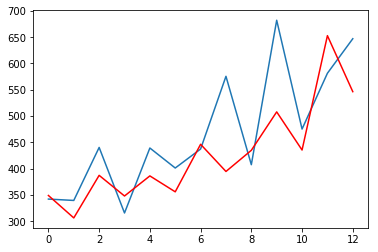

In [16]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()